<a href="https://colab.research.google.com/github/cristiandarioortegayubro/UNI/blob/main/colab/ad_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/cristiandarioortegayubro/UNI/blob/main/UNI%2039%20Aniversario.jpg?raw=true)

[UNI-DEPEC](https://posgrado.uni.edu.ni)

# **Árbol de decisión**

***Un árbol de decisión es un modelo predictivo formado por reglas binarias (si/no) con las que se consigue repartir observaciones del espacio muestral, en función de sus atributos y predecir así el valor de la variable objetivo, o variable dependiente.***

***Muchos métodos predictivos generan modelos en los que una ecuación se aplica a todo el espacio muestral.***

***Cuando el caso de uso implica múltiples predictores, que iteractúan entre ellos de forma compleja y no lineal, es muy difícil encontrar un único modelo global que sea capaz de reflejar la relación entre las distintas variables. El árbol de decisión engloba un conjunto de técnicas supervisadas no paramétricas que consiguen segmentar el espacio de los predictores en regiones simples, dentro de las cuales es más sencillo manejar esas interacciones.***

## **Activando las librerías necesarias**

### ***Para el análisis de datos y el conjunto de datos***

In [ ]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import pandas.testing as tm

### ***Para el preprocesado y el modelo***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### ***Para gráficos***

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

### ***Para serializar***

In [ ]:
import pickle

## **Conjunto de datos**

***El conjunto de datos contiene información sobre la venta de sillas infantiles en 400 tiendas distintas. Para cada una de las 400 tiendas se han registrado 11 variables. Se pretende generar un modelo de clasificación que permita predecir si una tienda tiene ventas altas $>$ 8 o bajas $<=$ 8, en función de todas las variables disponibles.***

### ***Obtención de los datos***

In [ ]:
sillitas=sm.datasets.get_rdataset("Carseats", "ISLR")

In [ ]:
datos=sillitas.data

### ***Información del conjunto de datos***

In [ ]:
print(sillitas.__doc__)

.. container::

   ======== ===============
   Carseats R Documentation
   ======== ===============

   .. rubric:: Sales of Child Car Seats
      :name: sales-of-child-car-seats

   .. rubric:: Description
      :name: description

   A simulated data set containing sales of child car seats at 400
   different stores.

   .. rubric:: Usage
      :name: usage

   ::

      Carseats

   .. rubric:: Format
      :name: format

   A data frame with 400 observations on the following 11 variables.

   ``Sales``
      Unit sales (in thousands) at each location

   ``CompPrice``
      Price charged by competitor at each location

   ``Income``
      Community income level (in thousands of dollars)

   ``Advertising``
      Local advertising budget for company at each location (in
      thousands of dollars)

   ``Population``
      Population size in region (in thousands)

   ``Price``
      Price company charges for car seats at each site

   ``ShelveLoc``
      A factor with levels ``Bad``,

## ***Análisis Exploratorio de los Datos***

### ***Visualización de las variables***

In [ ]:
datos.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### ***Información de las variables***

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### ***Ingeniería de variables***

***Se observa que la variable ventas es una variable continua y el objetivo del estudio es clasificar las tiendas según si venden mucho o poco, por lo tanto se crea una nueva variable con los siguientes valores (0, 1) denominada ventas_altas.***

In [ ]:
datos.insert(1, column="ventas_altas", value=np.where(datos.Sales > 8, 1, 0))

In [ ]:
datos.head(10)

,Sales,ventas_altas,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,0,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,1,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,0,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,1,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,0,132,110,0,108,124,Medium,76,10,No,No
9,4.69,0,132,113,0,131,124,Medium,76,17,No,Yes


***Ahora se procede a eliminar la variable ventas...***

In [ ]:
datos = datos.drop(columns = "Sales")
datos.head(10)

,ventas_altas,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
5,1,124,113,13,501,72,Bad,78,16,No,Yes
6,0,115,105,0,45,108,Medium,71,15,Yes,No
7,1,136,81,15,425,120,Good,67,10,Yes,Yes
8,0,132,110,0,108,124,Medium,76,10,No,No
9,0,132,113,0,131,124,Medium,76,17,No,Yes


## ***División del conjunto de datos***

In [ ]:
y = datos["ventas_altas"] # variable objetivo
X = datos.drop(columns=["ventas_altas"]) # vector de entrada

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [ ]:
X_train.shape

(300, 10)

In [ ]:
X_test.shape

(100, 10)

In [ ]:
y_train.shape

(300,)

In [ ]:
y_test.shape

(100,)

## ***Preprocesamiento de los datos***

***En el conjunto de datos hay variables categóricas por lo que, antes de entrenar el modelo, es necesario aplicar one-hot-encoding...***

### ***One-hot-encoding de las variables categóricas***

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 170 to 365
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    300 non-null    int64 
 1   Income       300 non-null    int64 
 2   Advertising  300 non-null    int64 
 3   Population   300 non-null    int64 
 4   Price        300 non-null    int64 
 5   ShelveLoc    300 non-null    object
 6   Age          300 non-null    int64 
 7   Education    300 non-null    int64 
 8   Urban        300 non-null    object
 9   US           300 non-null    object
dtypes: int64(7), object(3)
memory usage: 25.8+ KB


In [ ]:
cat_cols = X_train.select_dtypes(include="object").columns.to_list()

In [ ]:
numeric_cols = X_train.select_dtypes(include=["float64", "int64"]).columns.to_list()

***Se aplica one-hot-encoding solo a las columnas categóricas***

In [ ]:
preprocessor = ColumnTransformer([("onehot", OneHotEncoder(handle_unknown="ignore"), 
                                   cat_cols)],remainder="passthrough")

In [ ]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.fit_transform(X_test)

***Convertiendo el output del ColumnTransformer en dataframe y añadiendo el nombre de las columnas***

In [ ]:
encoded_cat = preprocessor.named_transformers_["onehot"].get_feature_names_out(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])

***Conversión a dataframe***

In [ ]:
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompPrice         300 non-null    float64
 1   Income            300 non-null    float64
 2   Advertising       300 non-null    float64
 3   Population        300 non-null    float64
 4   Price             300 non-null    float64
 5   Age               300 non-null    float64
 6   Education         300 non-null    float64
 7   ShelveLoc_Bad     300 non-null    float64
 8   ShelveLoc_Good    300 non-null    float64
 9   ShelveLoc_Medium  300 non-null    float64
 10  Urban_No          300 non-null    float64
 11  Urban_Yes         300 non-null    float64
 12  US_No             300 non-null    float64
 13  US_Yes            300 non-null    float64
dtypes: float64(14)
memory usage: 32.9 KB


In [ ]:
X_test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompPrice         100 non-null    float64
 1   Income            100 non-null    float64
 2   Advertising       100 non-null    float64
 3   Population        100 non-null    float64
 4   Price             100 non-null    float64
 5   Age               100 non-null    float64
 6   Education         100 non-null    float64
 7   ShelveLoc_Bad     100 non-null    float64
 8   ShelveLoc_Good    100 non-null    float64
 9   ShelveLoc_Medium  100 non-null    float64
 10  Urban_No          100 non-null    float64
 11  Urban_Yes         100 non-null    float64
 12  US_No             100 non-null    float64
 13  US_Yes            100 non-null    float64
dtypes: float64(14)
memory usage: 11.1 KB


## ***Generando el modelo***

***Se ajusta un árbol de clasificación empleando como variable objetivo ventas_altas y como predictores o vector de entrada, todas las variables restantes. Se utilizan en primer lugar los hiperparámetros max_depth=5 y criterion='gini', el resto se dejan por defecto. Después, se aplica el proceso de pruning y se comparan los resultados frente al modelo inicial.***

### **Parametrización del algoritmo**

In [ ]:
modelo = DecisionTreeClassifier(max_depth = 5, 
                                criterion = "gini", 
                                random_state = 123)

### **Entrenamiento del modelo**

In [ ]:
modelo.fit(X_train_prep, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

### **Visualización del modelo**

Profundidad del árbol: 5
Número de nodos terminales: 23


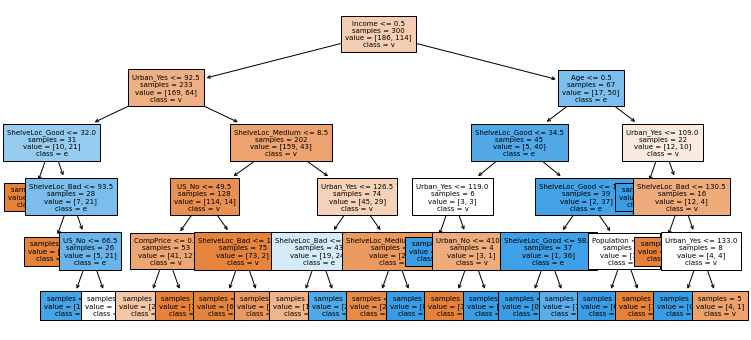

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(decision_tree = modelo,
                 feature_names = labels.tolist(),
                 class_names   = 'ventas_altas',
                 filled        = True,
                 impurity      = False,
                 fontsize      = 7,
                 ax            = ax)

## **Predicción y evaluación del modelo...**

### **Predicción**

In [ ]:
y_pred = modelo.predict(X_test_prep)

### **Matriz de confusión**

In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred)
print(mc)

[[44  6]
 [23 27]]


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=modelo.classes_)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)

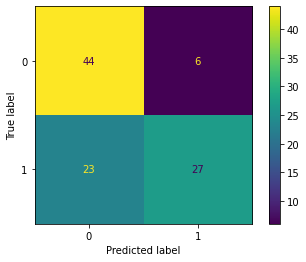

In [ ]:
disp.plot();

### **Metricas**

In [ ]:
reporte = metrics.classification_report(y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.66      0.88      0.75        50
           1       0.82      0.54      0.65        50

    accuracy                           0.71       100
   macro avg       0.74      0.71      0.70       100
weighted avg       0.74      0.71      0.70       100



***El modelo inicial es capaz de predecir correctamente un 71 % de las observaciones del conjunto de datos de prueba.***



## ***Comparación de árboles frente a modelos lineales...***

***La superioridad de los métodos basados en árboles de decisión frente a los métodos lineales depende del problema en de negocios. Cuando la relación entre el vector de entrada y la variable objetivo es aproximadamente lineal, un modelo de tipo regresión lineal funciona bien y supera a los árboles de regresión.***

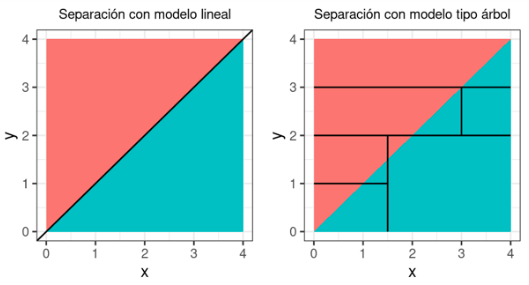

***Por el contrario, si la relación entre el vector de entrada y la variable o objetivo es de tipo no lineal y compleja, los métodos basados en árboles suelen superar a las aproximaciones lineales clásicas.***

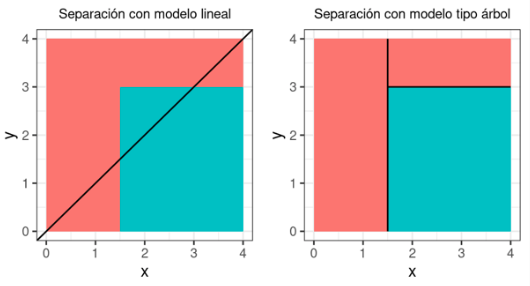